<a href="https://colab.research.google.com/github/Trodenn/Lboro_Ai_principles_group_project/blob/main/GroupPres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

importing libraries and modules is essesntial for functionality, machine learning and data modelling.

In [ ]:
data = pd.read_csv('diabetes.csv')

reads the file diabetes.csv usin pandas library and stores data into to pandas variable named data

# **Data Cleaning and Exploratory Data Analysis (EDA)**

In [ ]:
data.shape

(768, 9)

outputs the number of rolls and columns in the DataFrame

In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


This line of code displays the first 10 rows of the Pandas DataFrame called data. It's a useful way to quickly inspect the structure and content of your dataset.

In [ ]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


This code snippet aims to replace all occurrences of the value 0 with NaN (Not a Number) in specific columns except pregnancies and outcome features of your DataFrame. This is often done in data cleaning to handle missing or invalid values.

In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Shows the new output after 0 is replaced with NaN

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


This line of code calculates and displays the number of missing values (NaN) in each column of the Pandas DataFrame called data. It's a useful way to identify columns with missing data and understand the extent of missingness in your dataset.

In [ ]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106.0,76.0,NaN,NaN,37.5,0.197,26,0
759,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1
767,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This line of code provides descriptive statistics of the numerical columns in the Pandas DataFrame called data. It's a useful way to get a quick overview of the central tendency, dispersion, and shape of the distribution of your data, which can be used to create histograms and boxplot.

In [ ]:
# data['Insulin'].fillna(data['Insulin'].mean(), inplace=True)

# we want to impute with KNN
imputer = KNNImputer(n_neighbors=5)
data[columns_to_replace] = imputer.fit_transform(data[columns_to_replace])
data










,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0
2,8,183.0,64.0,23.4,174.6,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1,126.0,60.0,33.4,134.2,30.1,0.349,47.0,1


This code snippet performs imputation using the K-Nearest Neighbors (KNN) algorithm to fill in missing values (NaN) in the specified columns of the DataFrame.

Checks for missing values after the KNN implementation

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106.0,76.0,34.4,166.2,37.5,0.197,26.0,0
759,6,190.0,92.0,26.0,227.0,35.5,0.278,66.0,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22.0,0
761,9,170.0,74.0,31.0,212.0,44.0,0.403,43.0,1
762,9,89.0,62.0,20.2,43.0,22.5,0.142,33.0,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1,126.0,60.0,33.4,134.2,30.1,0.349,47.0,1
767,1,93.0,70.0,31.0,66.6,30.4,0.315,23.0,0


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0
2,8,183.0,64.0,23.4,174.6,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


This line of code provides descriptive statistics of the numerical columns in the Pandas DataFrame called data, after the imputation step. It's a useful way to get a quick overview of the central tendency, dispersion, and shape of the distribution of your data after filling in the missing values using KNN

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.601562,72.325781,29.096615,152.724479,32.434479,0.471876,33.240885,0.348958
std,3.369578,30.494403,12.193908,9.424697,98.502206,6.883819,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.450000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,131.600000,32.190000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,191.050000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This code snippet identifies and displays duplicate rows in the Pandas DataFrame called data.

In [ ]:
duplicates = data.duplicated()
duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [ ]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
data.drop_duplicates(inplace=True)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.0,33.60,0.627,50.0,1
1,1,85.0,66.0,29.0,58.6,26.60,0.351,31.0,0
2,8,183.0,64.0,23.4,174.6,23.30,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.10,2.288,33.0,1
5,5,116.0,74.0,20.2,98.0,25.60,0.201,30.0,0
6,3,78.0,50.0,32.0,88.0,31.00,0.248,26.0,1
7,10,115.0,68.4,28.6,123.2,35.30,0.134,29.0,0
8,2,197.0,70.0,45.0,543.0,30.50,0.158,53.0,1
9,8,125.0,96.0,26.4,165.8,34.92,0.232,54.0,1


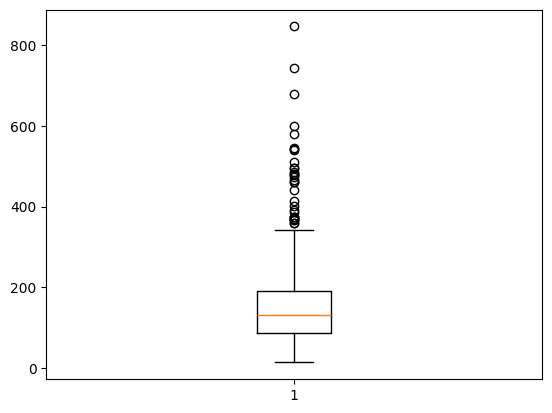

In [ ]:
#using boxplot to visulize outliers for all features except Outcome
plt.boxplot(data['Insulin'])
plt.show()



Graph shows the histogram of Insulin, showing a positive skewed distribution.

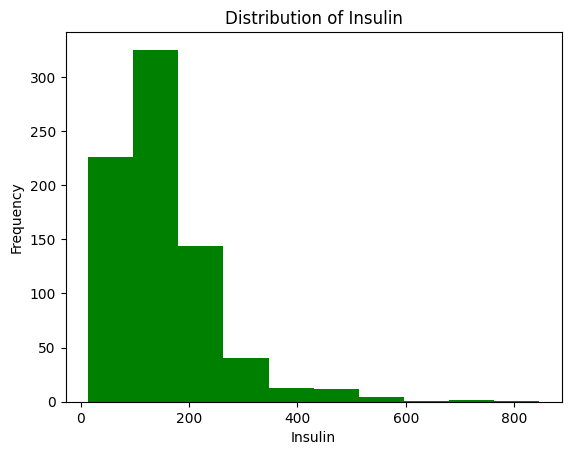

In [ ]:
plt.hist(data['Insulin'], color='g')
plt.xlabel('Insulin')

plt.ylabel('Frequency')

plt.title('Distribution of Insulin')

plt.show()

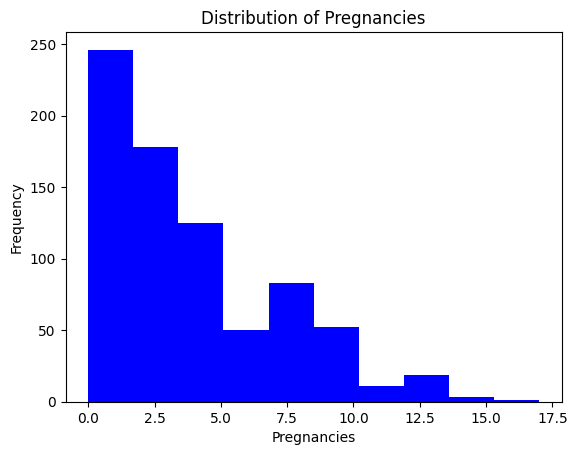

In [ ]:
plt.hist(data['Pregnancies'], color='b')
plt.xlabel('Pregnancies')

plt.ylabel('Frequency')

plt.title('Distribution of Pregnancies')

plt.show()

In [ ]:
data.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [ ]:
data.shape


(768, 9)

In [ ]:
mean = data['Insulin'].mean()
median = data['Insulin'].median()
std = data['Insulin'].std()
min_value = data['Insulin'].min()
max_value = data['Insulin'].max()

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

# You can also use the describe() method for a quick overview:
print(data['Insulin'].describe())

Mean: 152.72447916666667
Median: 131.60000000000002
Standard Deviation: 98.50220587865914
Minimum Value: 14.0
Maximum Value: 846.0
count    768.000000
mean     152.724479
std       98.502206
min       14.000000
25%       87.450000
50%      131.600000
75%      191.050000
max      846.000000
Name: Insulin, dtype: float64


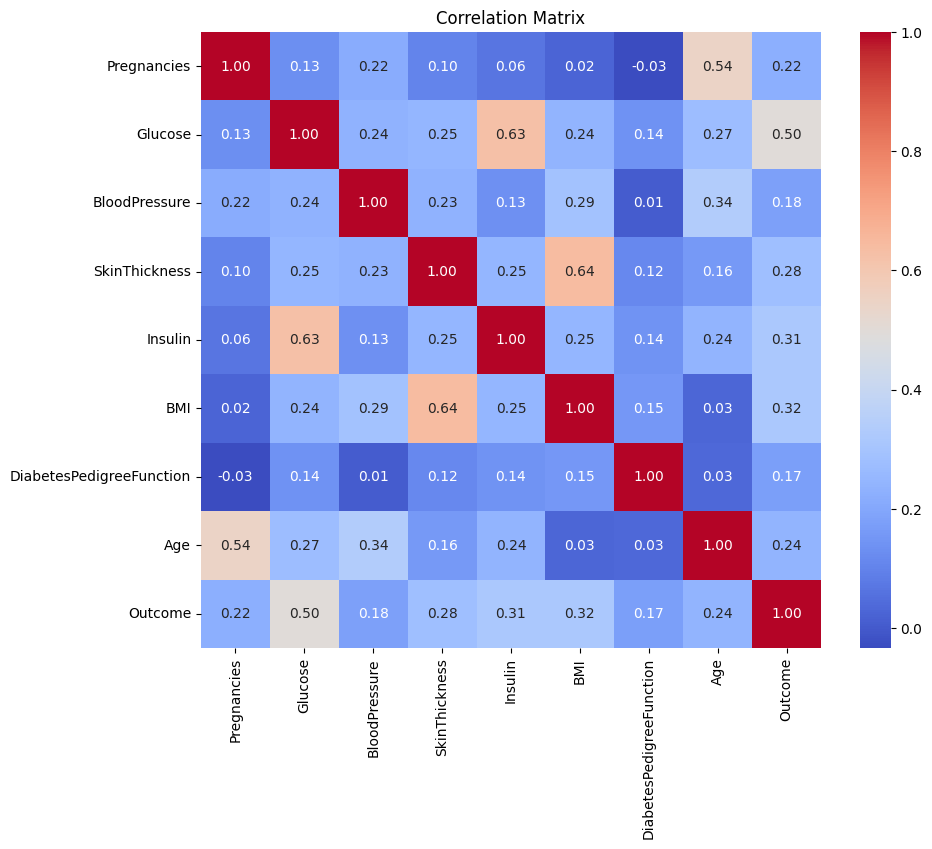

In [ ]:
correlation_matrix = data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


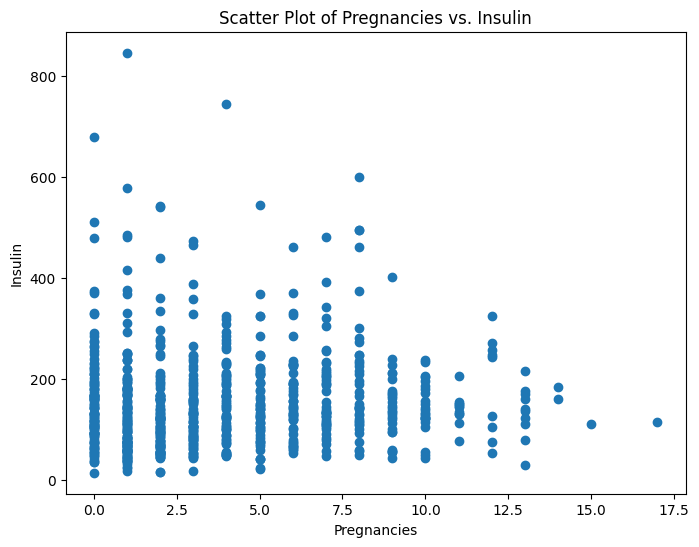

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(data['Pregnancies'], data['Insulin'])

plt.xlabel('Pregnancies')

plt.ylabel('Insulin')

plt.title('Scatter Plot of Pregnancies vs. Insulin')

plt.show()



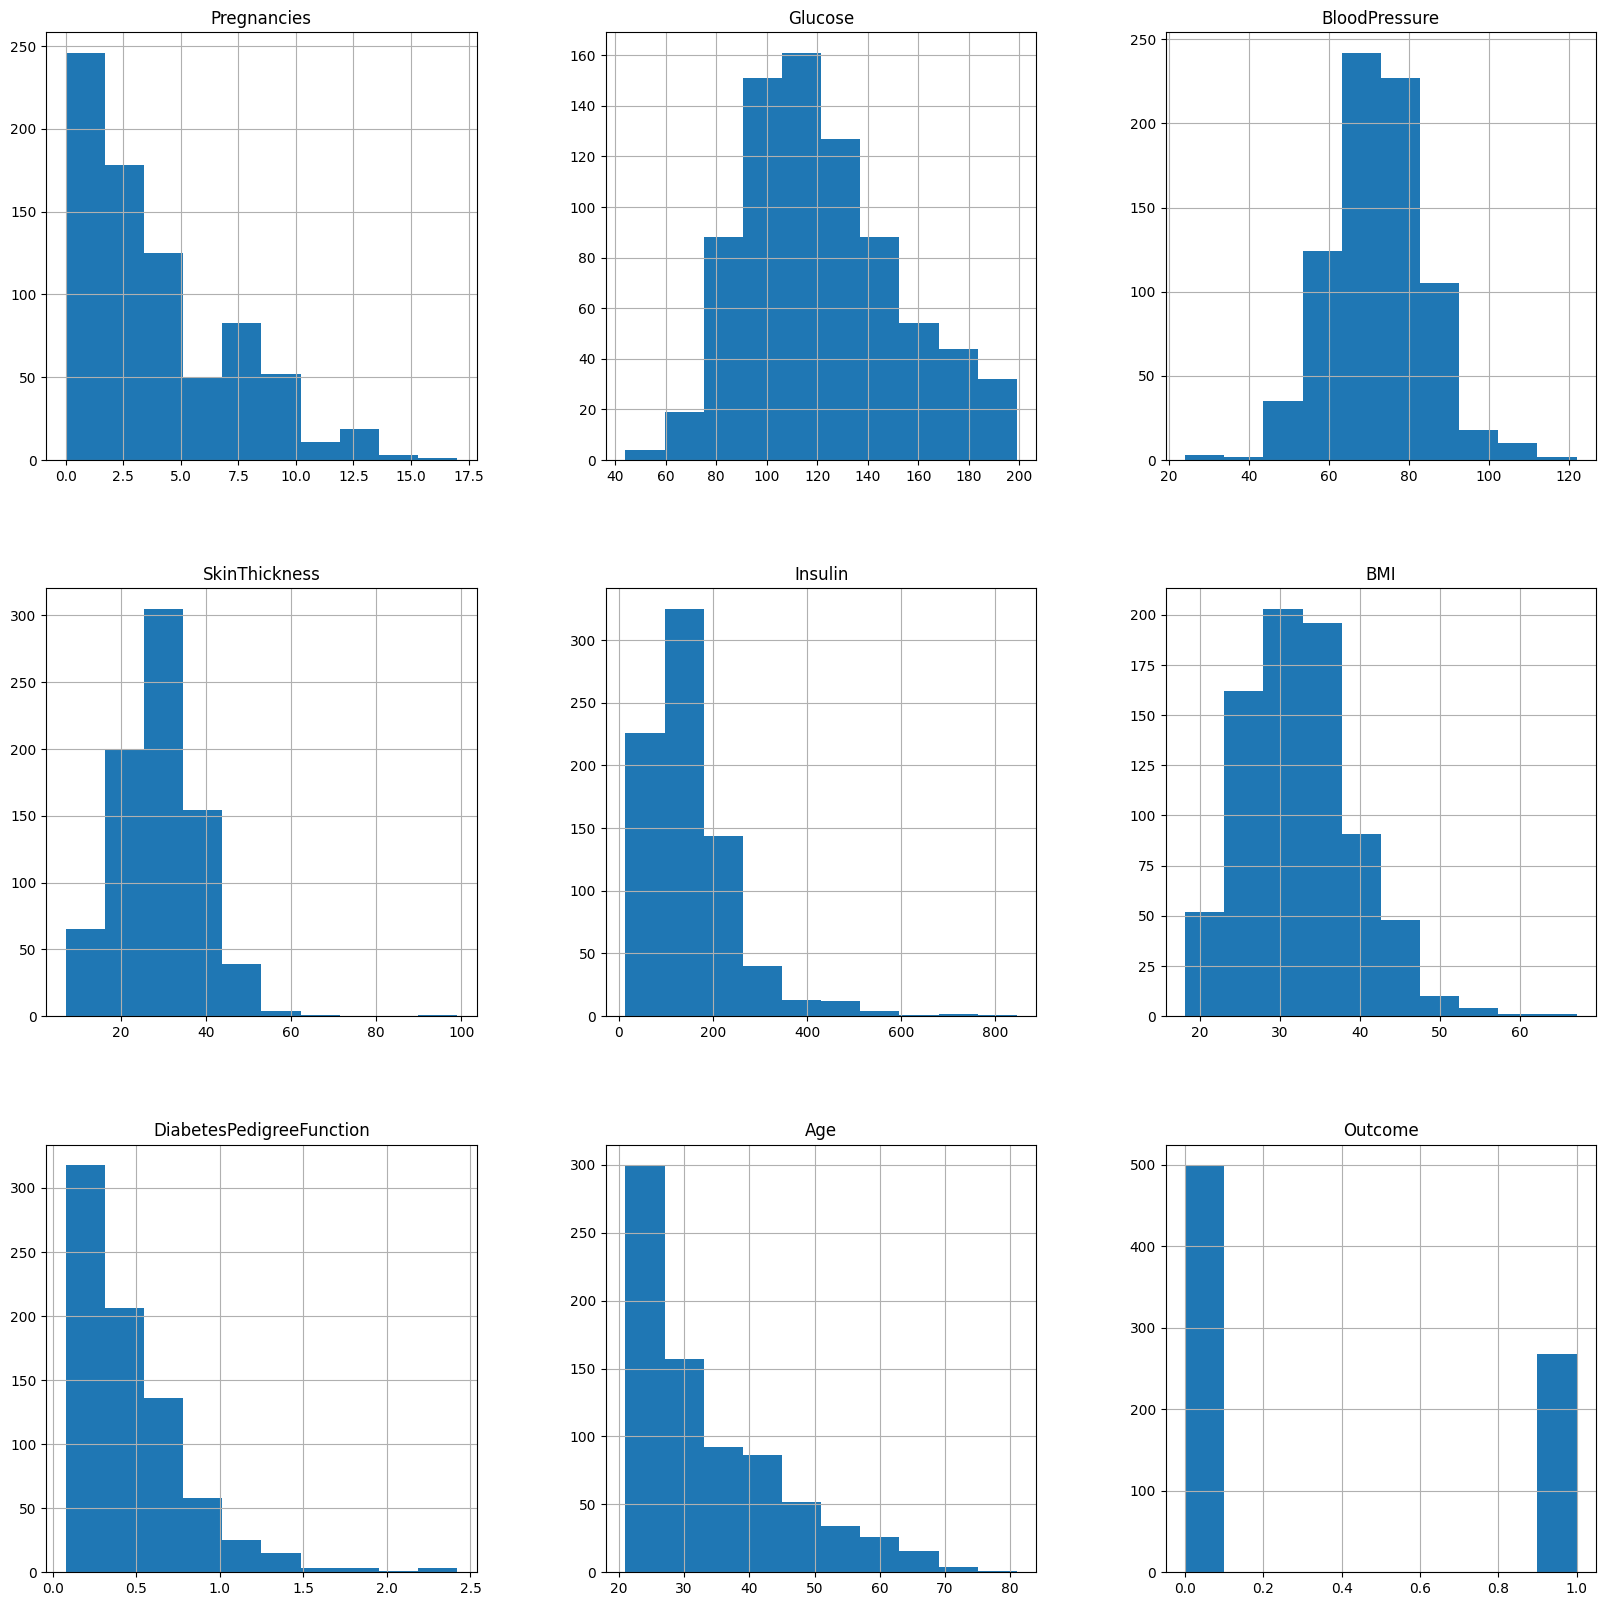

In [ ]:
p = data.hist(figsize = (20,20))

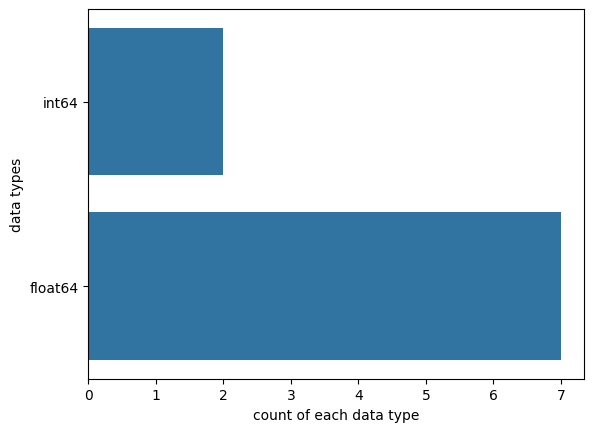

In [ ]:
sns.countplot(y=data.dtypes ,data=data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

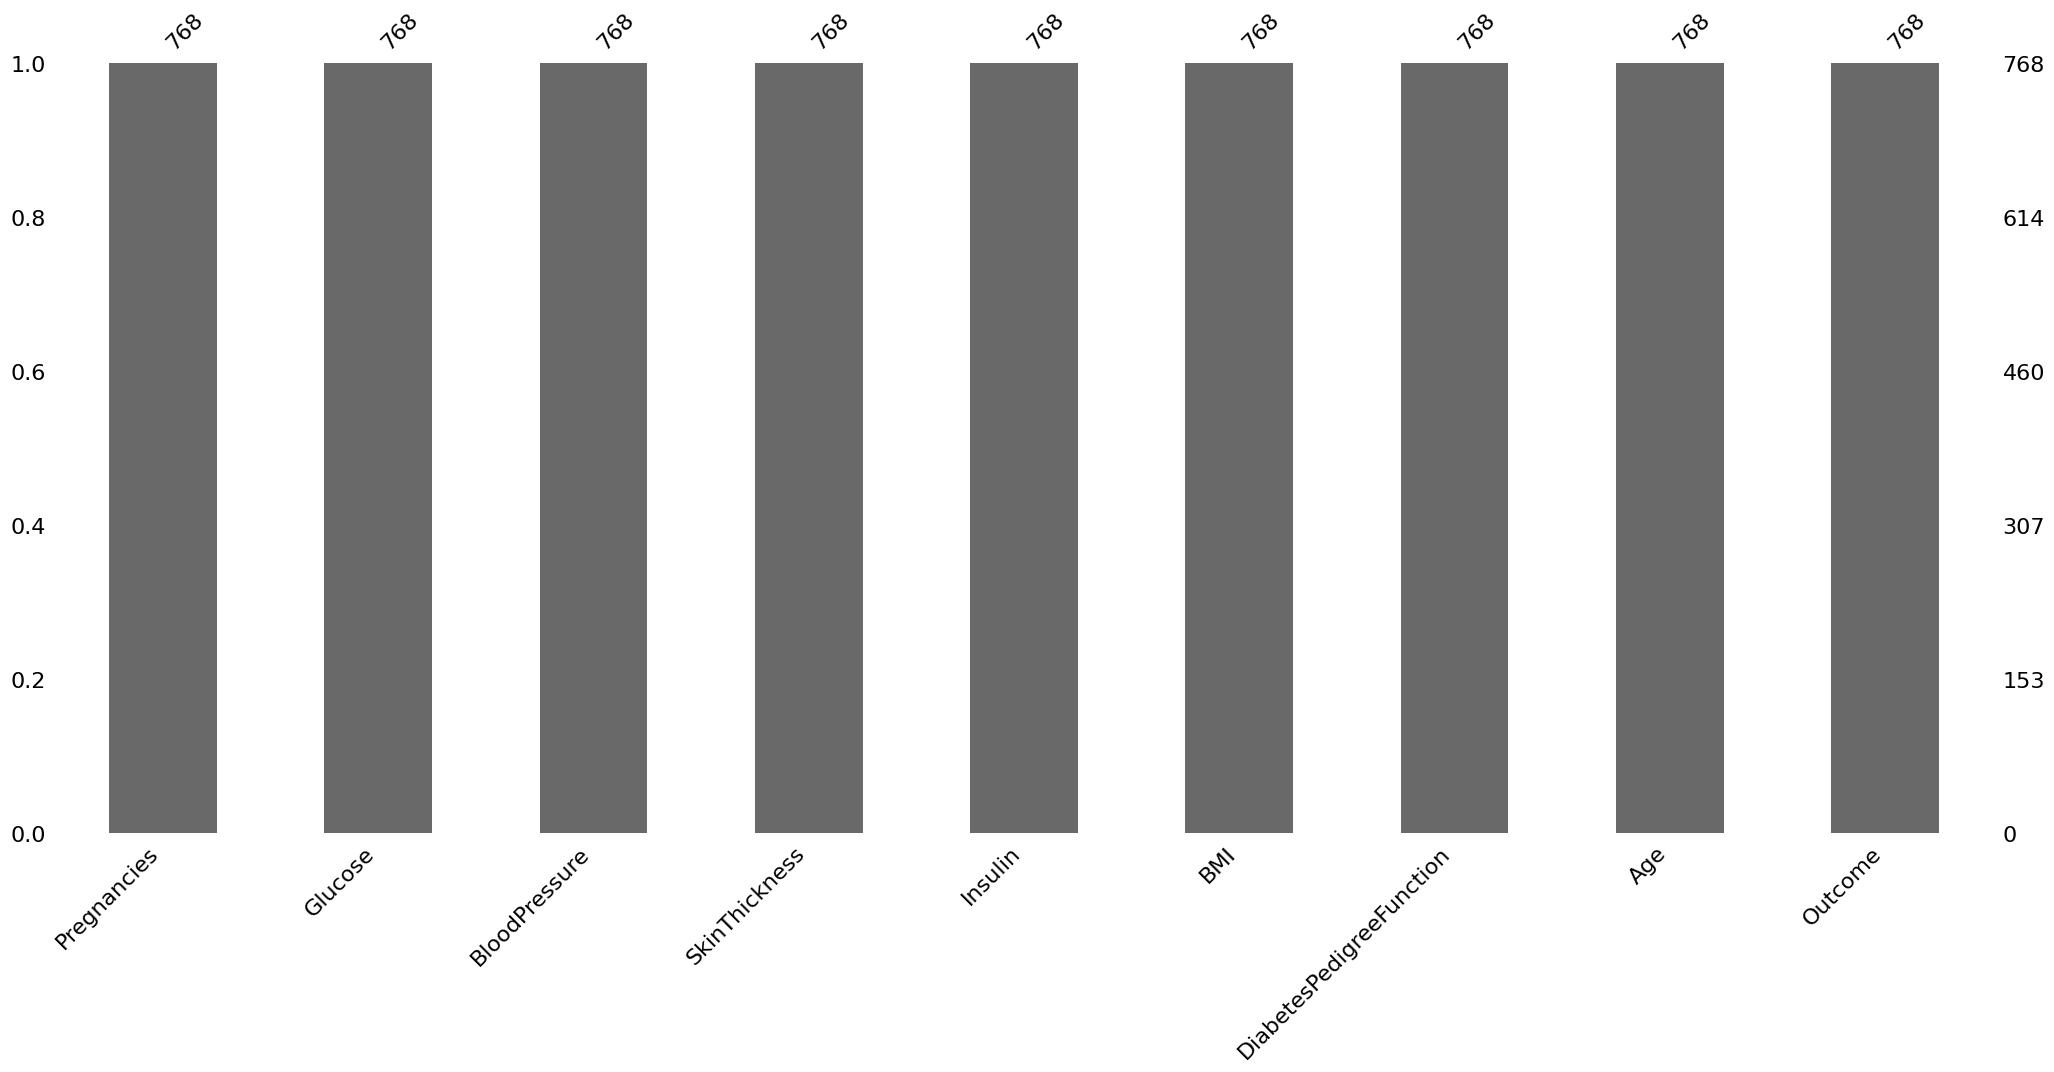

In [ ]:
p=msno.bar(data)

Outcome
0    500
1    268
Name: count, dtype: int64


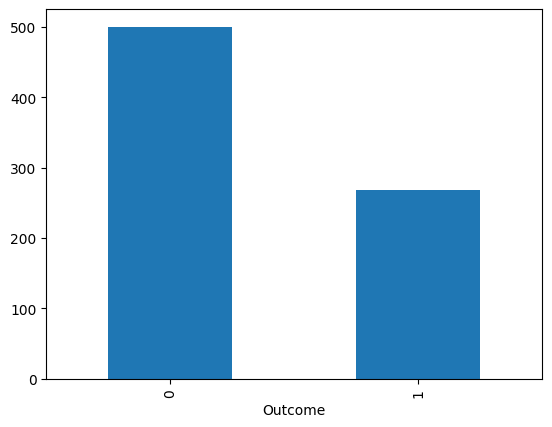

In [ ]:
color_wheel = {1: "p",
               2: "g"}
colors = data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="bar")

This line of code using pair plot using the Seaborn library (sns). A pair plot grid show a the plot of histogram diagonally and scatterplot showing the relationship between the pairs of features in the dataset.

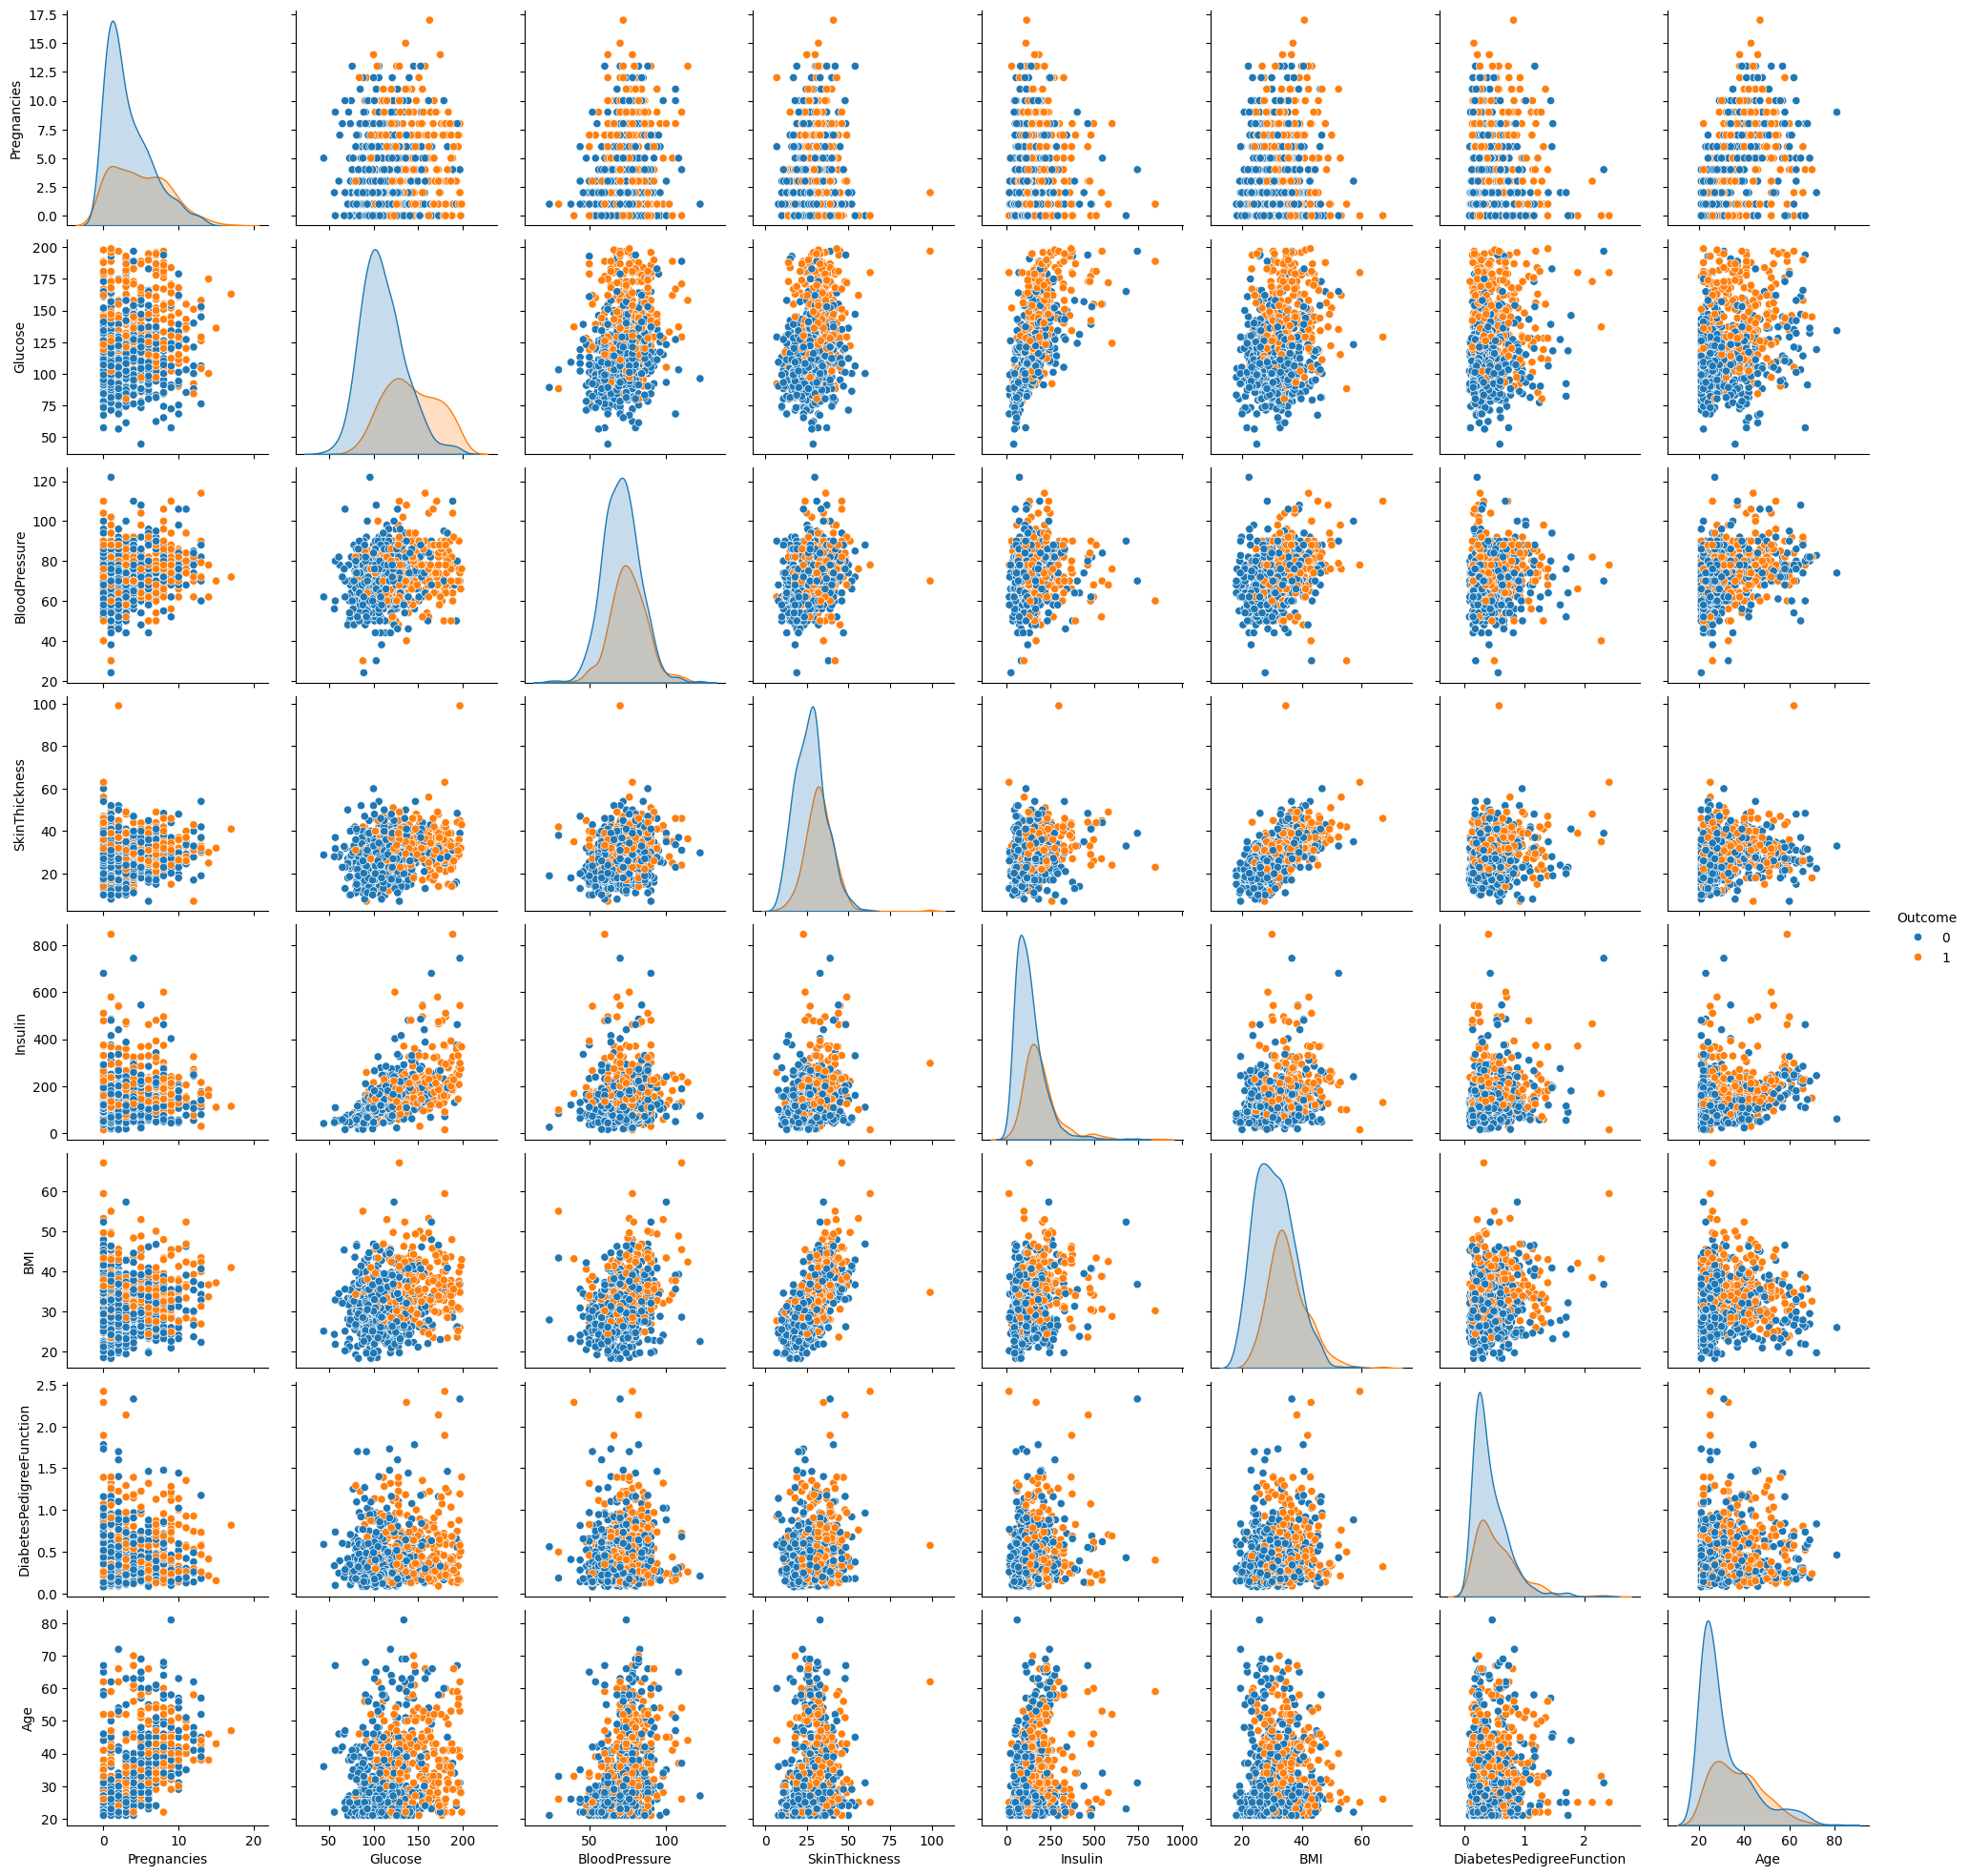

In [ ]:
p=sns.pairplot(data, hue = 'Outcome')


The purpose of this script of code is to provide scaling using the Standard Scaler from scikit-learn. It scales the features except 'Outcome' to eliminate mean and provide unit variance to prevent large values dominating the data output.

In [ ]:
scaling = StandardScaler()
G =  pd.DataFrame(scaling.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
G.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866246,-0.026734,0.626782,0.165338,0.169423,0.468492,1.425995
1,-0.844885,-1.201054,-0.519104,-0.010258,-0.956180,-0.848117,-0.365061,-0.190672
2,1.233880,2.014745,-0.683227,-0.604829,0.222226,-1.327814,0.604397,-0.105584
3,-0.844885,-1.069797,-0.519104,-0.647298,-0.596563,-0.630072,-0.920763,-1.041549
4,-1.141852,0.505289,-2.652706,0.626782,0.155179,1.550371,5.484909,-0.020496


In [ ]:
y = data.Outcome

This line of code splits your data into training and testing sets using the train_test_split function from scikit-learn. This is a crucial step in machine learning to evaluate the performance of your model on unseen data.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(G,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.74609375

In [ ]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,144,23,167
1,42,47,89
All,186,70,256


Text(0.5, 23.52222222222222, 'Predicted label')

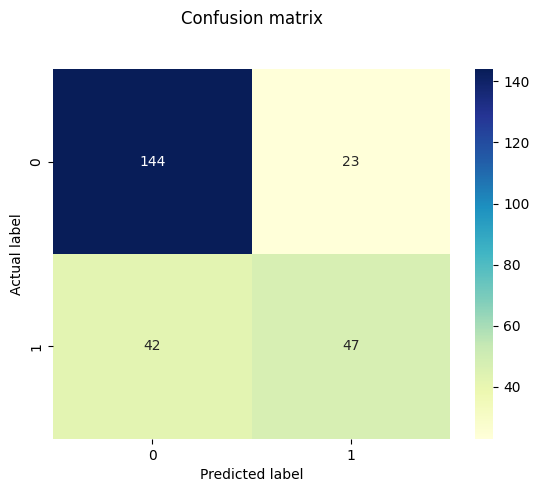

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       167
           1       0.67      0.53      0.59        89

    accuracy                           0.75       256
   macro avg       0.72      0.70      0.70       256
weighted avg       0.74      0.75      0.74       256



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

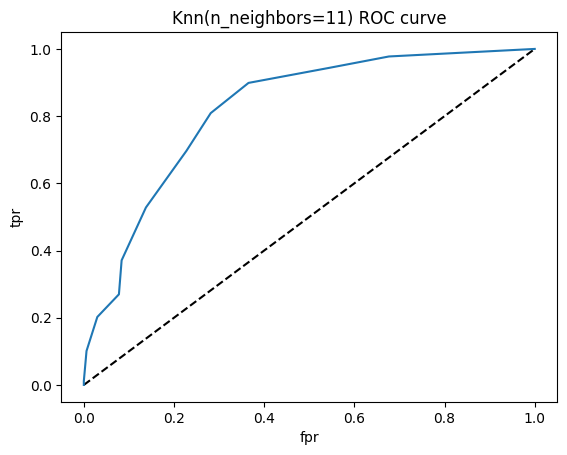

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()